# 3. DATA PREPARATION (Preparação dos Dados)

## Bibliotecas / Configuração

In [1]:
### Mapeando bibliotecas necessárias
# Manipulação dos dados
import pandas as pd
import numpy as np
import calendar

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print('Ambiente Preparado')

Ambiente Preparado


## Carregamento dos Dados

In [2]:
# Caminho do arquivo
file_path = '../../dados/raw/Dados_PRF_2024.csv'

# Carregando o dataset
abt00 = pd.read_csv(file_path, encoding = 'ISO-8859-1', sep = ';')

print('Dataset carregado')
print(f"Dataset carregado: {abt00.shape[0]:,} registros e {abt00.shape[1]} colunas")

Dataset carregado
Dataset carregado: 73,156 registros e 30 colunas


## Limpeza e Transformação dos Dados

In [3]:
# Preparação dos dados para análise
abt01 = abt00.copy()

### Data

In [4]:
# Conversão de data
abt01['data_inversa'] = pd.to_datetime(abt01['data_inversa'])
abt01['mes'] = abt01['data_inversa'].dt.month.apply(lambda x: calendar.month_name[x].capitalize())
abt01['horario'] = pd.to_datetime(abt01['horario'], format='%H:%M:%S', errors='coerce').dt.hour

In [5]:
# Validação
abt01_data = abt01[['data_inversa', 'horario', 'dia_semana', 'mes']]
display(abt01_data.head(3))

,data_inversa,horario,dia_semana,mes
0,2024-01-01,3,segunda-feira,January
1,2024-01-01,4,segunda-feira,January
2,2024-01-01,4,segunda-feira,January


In [6]:
# Criação de variáveis derivadas para análise de segurança
abt01['gravidade'] = pd.cut(abt01['mortos'], 
                              bins=[-1, 0, 1, 5, float('inf')], 
                              labels=['Sem Mortes', 'Baixa', 'Média', 'Alta'])

abt01['acidente_grave'] = (abt01['mortos'] > 1) | (abt01['feridos_graves'] > 0)

print("✅ Dados preparados para análise")
print(f"📊 Registros após limpeza: {abt01.shape[0]:,} registros e {abt01.shape[1]} colunas")

✅ Dados preparados para análise
📊 Registros após limpeza: 73,156 registros e 33 colunas


In [7]:
# Salva o DataFrame como CSV
#abt01.to_csv('./dados/processed/abt01.csv', index=False)

# 4. MODELING & DATA MINING (Modelagem / Mineração)

## Análise Temporal - Quando Ocorrem Mais Acidentes?

### Acidentes por mês

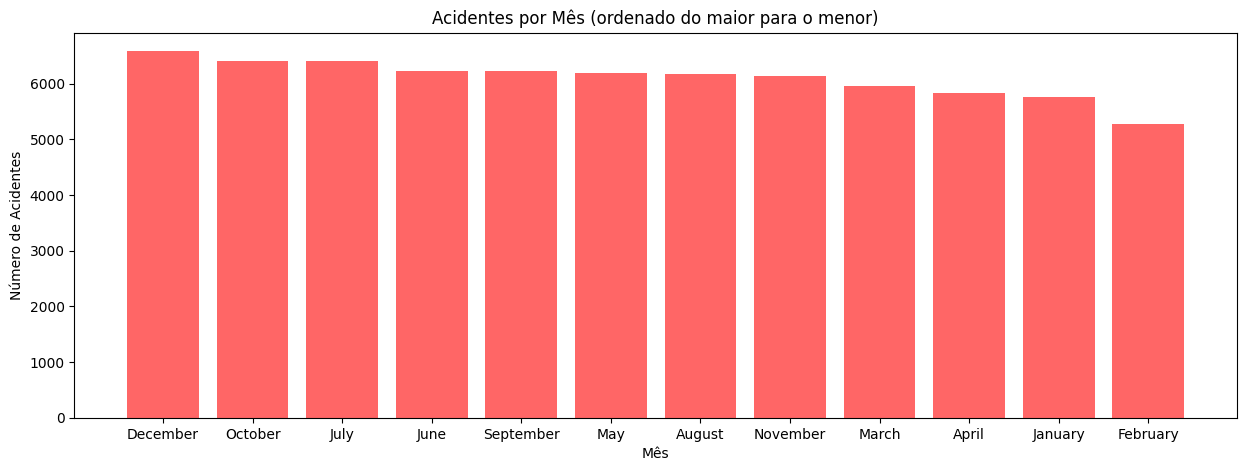

In [8]:
# Agrupa os acidentes por mês
acidentes_mes = abt01.groupby('mes').size()

# Ordena do maior para o menor (Valor)
acidentes_mes = acidentes_mes.sort_values(ascending=False)

# Cria a figura e o gráfico de barras
plt.figure(figsize=(15,5))
plt.bar(acidentes_mes.index, acidentes_mes.values, color='red', alpha=0.6)

# Ajusta rótulos e título
#plt.xticks(rotation=90)  # Rotaciona os meses
plt.title('Acidentes por Mês (ordenado do maior para o menor)')
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')

# Mostra o gráfico
plt.show()


### Acidentes por dia da semana

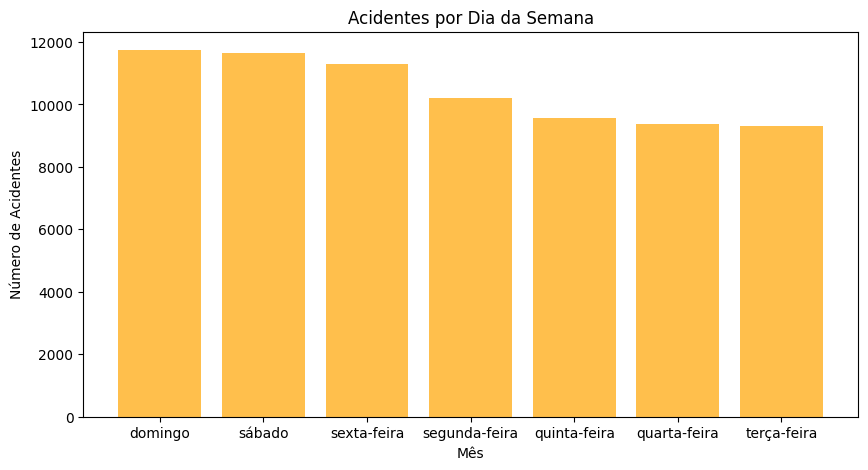

In [9]:
# Conta os acidentes por dia da semana e reordena
acidentes_dia = abt01['dia_semana'].value_counts()

# Cria a figura e o gráfico de barras
plt.figure(figsize=(10,5))
plt.bar(acidentes_dia.index, acidentes_dia.values, color='orange', alpha=0.7)

# Ajusta rótulos e título
plt.title('Acidentes por Dia da Semana')
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')

# Mostra o gráfico
plt.show()


### Acidentes por hora

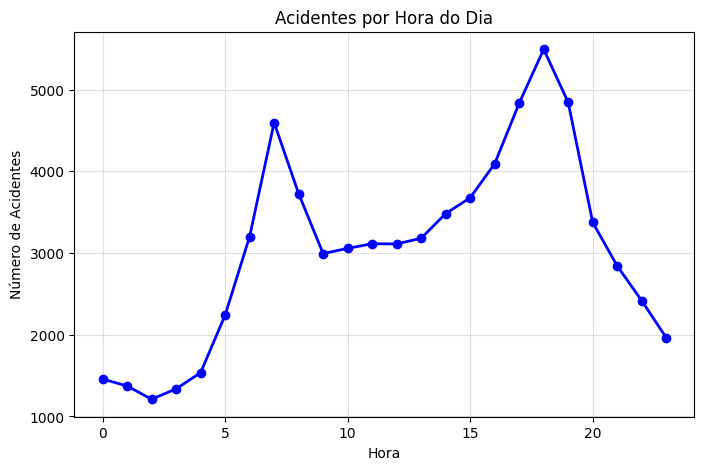

In [10]:
# Agrupa os acidentes por horário do dia
acidentes_hora = abt01.groupby('horario').size()

# Gráfico de linha com marcadores
plt.figure(figsize=(8,5))
plt.plot(acidentes_hora.index, acidentes_hora.values, marker='o', color='blue', linewidth=2)

# Ajusta título e eixos
plt.title('Acidentes por Hora do Dia')
plt.xlabel('Hora')
plt.ylabel('Número de Acidentes')
plt.grid(True, alpha=0.4)  # Grade leve para visualização

# Mostra o gráfico
plt.show()


### Mortes por hora

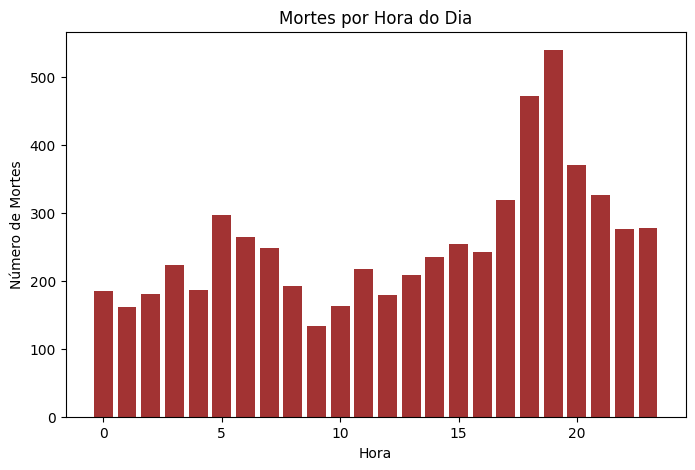

In [11]:
# Agrupa o total de mortos por horário
mortos_hora = abt01.groupby('horario')['mortos'].sum()

# Gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(mortos_hora.index, mortos_hora.values, color='darkred', alpha=0.8)

# Ajusta título e eixos
plt.title('Mortes por Hora do Dia')
plt.xlabel('Hora')
plt.ylabel('Número de Mortes')

# Mostra o gráfico
plt.show()

### Insights temporais

In [12]:
# Mostra insights rápidos para tomada de decisão preventiva
print("INSIGHTS TEMPORAIS PARA AÇÃO PREVENTIVA:")

# Identifica o mês com mais acidentes
print(f"📅 Mês com mais acidentes: {acidentes_mes.idxmax()} ({acidentes_mes.max():,} acidentes)")

# Identifica o dia da semana mais crítico
print(f"📅 Dia da semana crítico: {acidentes_dia.idxmax()} ({acidentes_dia.max():,} acidentes)")

# Identifica o horário mais perigoso em termos de mortes
print(f"🕐 Hora mais perigosa: {mortos_hora.idxmax()}h ({mortos_hora.max()} mortes)")


INSIGHTS TEMPORAIS PARA AÇÃO PREVENTIVA:
📅 Mês com mais acidentes: December (6,587 acidentes)
📅 Dia da semana crítico: domingo (11,741 acidentes)
🕐 Hora mais perigosa: 19h (540 mortes)


## Análise Geográfica - Onde Focar os Esforços?

### Top 10 BRs com mais acidentes

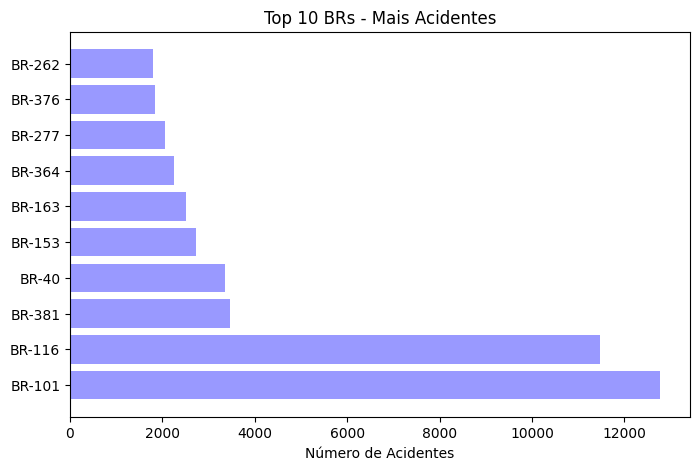

In [13]:
# Seleciona as 10 BRs com mais acidentes
top_brs = abt01['br'].value_counts().head(10)

# Gráfico de barras horizontais
plt.figure(figsize=(8,5))
plt.barh(range(len(top_brs)), top_brs.values, color='blue', alpha=0.4)

# Ajusta rótulos e título
plt.yticks(range(len(top_brs)), [f'BR-{br}' for br in top_brs.index])  # Prefixa "BR-" nos nomes
plt.title('Top 10 BRs - Mais Acidentes')
plt.xlabel('Número de Acidentes')

# Mostra o gráfico
plt.show()

### Top 10 UFs com mais acidentes

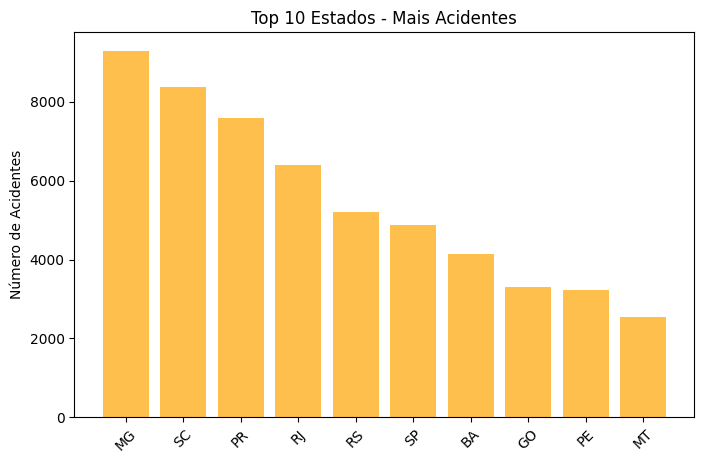

In [14]:
# Seleciona os 10 estados (UFs) com mais acidentes
top_ufs = abt01['uf'].value_counts().head(10)

# Gráfico de barras verticais
plt.figure(figsize=(8,5))
plt.bar(range(len(top_ufs)), top_ufs.values, color='orange', alpha=0.7)

# Ajusta rótulos e título
plt.xticks(range(len(top_ufs)), top_ufs.index, rotation=45)  # Rótulos inclinados para não sobrepor
plt.title('Top 10 Estados - Mais Acidentes')
plt.ylabel('Número de Acidentes')

# Mostra o gráfico
plt.show()


### Mortalidade por UF

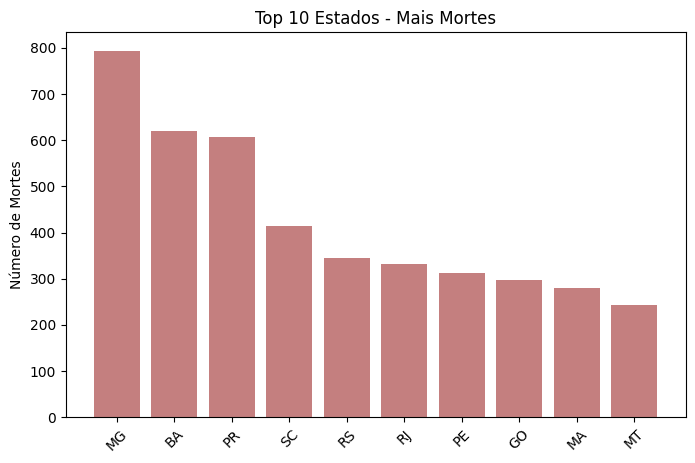

In [15]:
# Soma as mortes por estado e pega o top 10
mortalidade_uf = abt01.groupby('uf')['mortos'].sum().sort_values(ascending=False).head(10)

# Gráfico de barras verticais
plt.figure(figsize=(8,5))
plt.bar(range(len(mortalidade_uf)), mortalidade_uf.values, color='darkred', alpha=0.5)

# Ajusta rótulos e título
plt.xticks(range(len(mortalidade_uf)), mortalidade_uf.index, rotation=45)
plt.title('Top 10 Estados - Mais Mortes')
plt.ylabel('Número de Mortes')

# Mostra o gráfico
plt.show()


### Insights geográficos

In [16]:
# Mostra insights práticos para direcionar recursos
print("PRIORIDADES GEOGRÁFICAS:")

# BR mais crítica em termos de número de acidentes
print(f"🛣️  BR mais crítica: BR-{top_brs.index[0]} ({top_brs.iloc[0]:,} acidentes)")

# Estado com mais acidentes
print(f"🏛️  Estado mais crítico: {top_ufs.index[0]} ({top_ufs.iloc[0]:,} acidentes)")

# Estado com maior número de mortes
print(f"⚰️  Estado com mais mortes: {mortalidade_uf.index[0]} ({mortalidade_uf.iloc[0]} mortes)")


PRIORIDADES GEOGRÁFICAS:
🛣️  BR mais crítica: BR-101 (12,778 acidentes)
🏛️  Estado mais crítico: MG (9,296 acidentes)
⚰️  Estado com mais mortes: MG (794 mortes)


## Análise de Causas - Principais Fatores de Risco

### Top 10 causas de acidentes

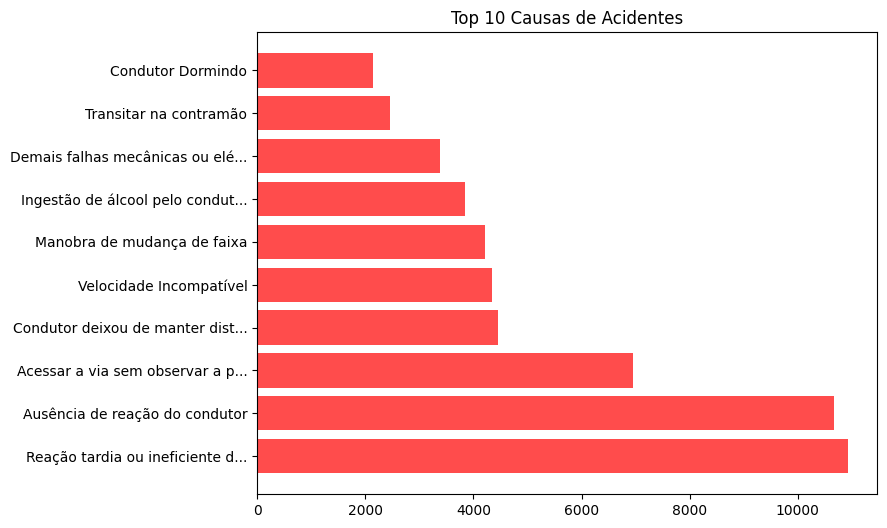

In [17]:
# Seleciona as 10 principais causas de acidentes
top_causas = abt01['causa_acidente'].value_counts().head(10)

# Gráfico de barras horizontais
plt.figure(figsize=(8,6))
plt.barh(range(len(top_causas)), top_causas.values, color='red', alpha=0.7)

# Ajusta rótulos (corta textos muito longos para não poluir)
plt.yticks(
    range(len(top_causas)), 
    [causa[:30] + '...' if len(causa) > 30 else causa for causa in top_causas.index]
)
plt.title('Top 10 Causas de Acidentes')

# Mostra o gráfico
plt.show()


### Tipos de acidentes

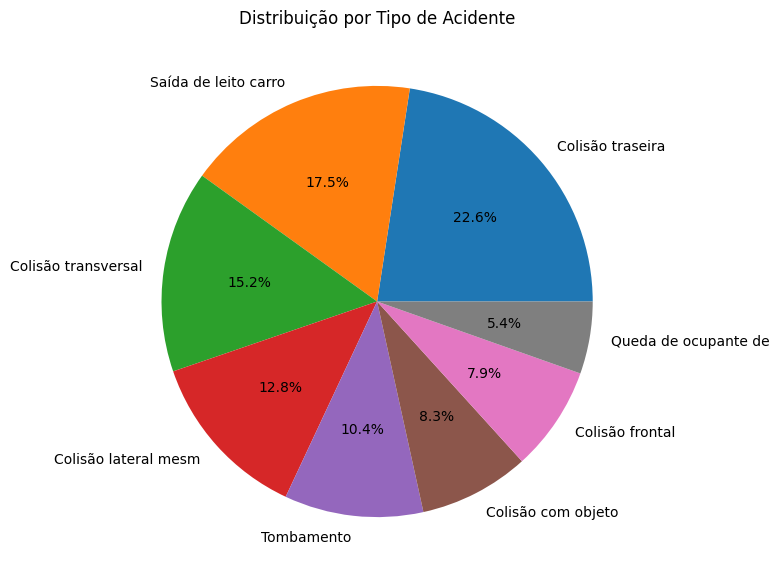

In [18]:
# Seleciona os 8 tipos mais comuns de acidentes
top_tipos = abt01['tipo_acidente'].value_counts().head(8)

# Gráfico de pizza (percentual por tipo)
plt.figure(figsize=(7,7))
plt.pie(
    top_tipos.values, 
    labels=[tipo[:20] for tipo in top_tipos.index],  # Corta nomes longos
    autopct='%1.1f%%'
)
plt.title('Distribuição por Tipo de Acidente')

# Mostra o gráfico
plt.show()


“Quer causar briga em um meetup de Data Science? Mostra um gráfico de pizza na apresentação.” 👆
>Na prática, o problema é que o olho humano é ruim de comparar ângulos. Se alguém te perguntar qual fatia é maior, você pode acabar chutando errado — já num barplot, a diferença fica explícita.

### Condições meteorológicas

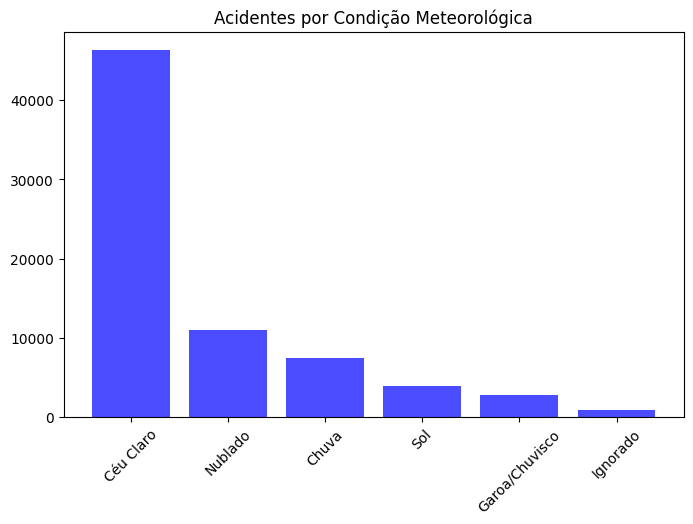

In [19]:
# Conta acidentes por condição meteorológica (pega top 6)
condicoes_met = abt01['condicao_metereologica'].value_counts().head(6)

# Gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(range(len(condicoes_met)), condicoes_met.values, color='blue', alpha=0.7)

# Ajusta rótulos
plt.xticks(range(len(condicoes_met)), [cond[:15] for cond in condicoes_met.index], rotation=45)
plt.title('Acidentes por Condição Meteorológica')

# Mostra o gráfico
plt.show()


### Fase do dia

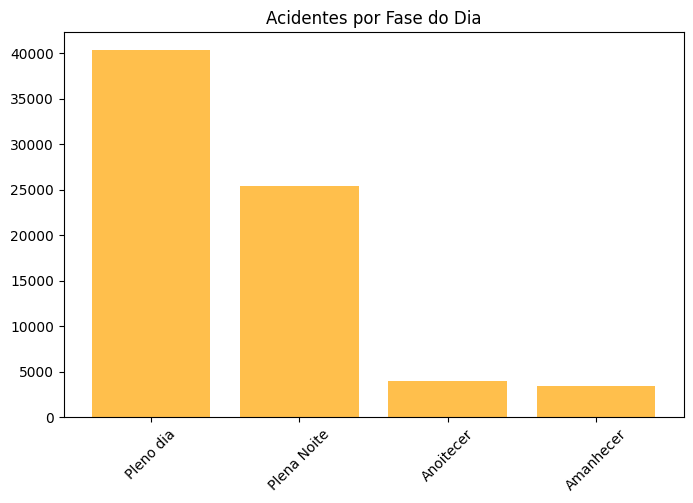

In [20]:
# Conta acidentes por fase do dia (manhã, tarde, noite, madrugada)
fase_dia = abt01['fase_dia'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(fase_dia.index, fase_dia.values, color='orange', alpha=0.7)

# Ajusta rótulos
plt.title('Acidentes por Fase do Dia')
plt.xticks(rotation=45)

# Mostra o gráfico
plt.show()


### Insights sobre fatores de risco

In [21]:
# Mostra um resumo dos principais fatores de risco identificados
print("PRINCIPAIS FATORES DE RISCO:")

# Causa mais frequente
print(f"🚗 Causa #1: {top_causas.index[0]} ({top_causas.iloc[0]:,} casos)")

# Tipo de acidente mais comum
print(f"💥 Tipo #1: {top_tipos.index[0]} ({top_tipos.iloc[0]:,} casos)")

# Condição climática mais crítica
print(f"🌤️ Condição crítica: {condicoes_met.index[0]} ({condicoes_met.iloc[0]:,} casos)")


PRINCIPAIS FATORES DE RISCO:
🚗 Causa #1: Reação tardia ou ineficiente do condutor (10,920 casos)
💥 Tipo #1: Colisão traseira (13,960 casos)
🌤️ Condição crítica: Céu Claro (46,271 casos)


### Condições meteorológicas

## Análise de Gravidade - Acidentes Mais Letais

### Distribuição da gravidade dos acidentes

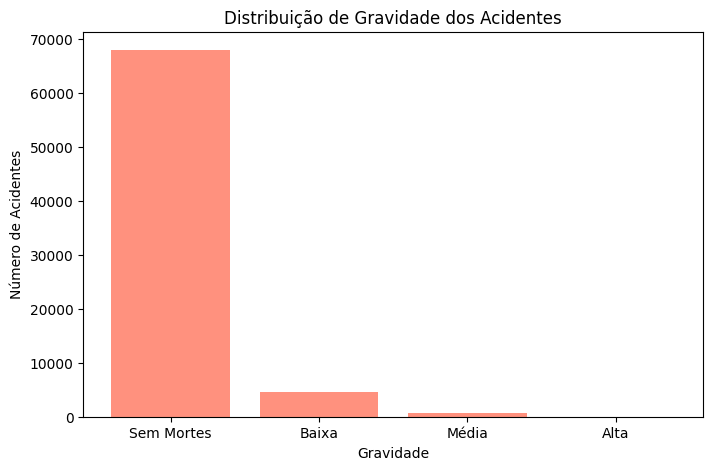

In [22]:
# Conta a frequência de cada nível de gravidade
gravidade_dist = abt01['gravidade'].value_counts()

# Gráfico de barras mostrando a proporção de cada gravidade
plt.figure(figsize=(8,5))
plt.bar(
    gravidade_dist.index, 
    gravidade_dist.values, 
    color='tomato', 
    alpha=0.7
)

# Ajustes de rótulos e título
plt.title('Distribuição de Gravidade dos Acidentes')
plt.xlabel('Gravidade')
plt.ylabel('Número de Acidentes')

# Mostra o gráfico
plt.show()


### Mortalidade por tipo de acidente

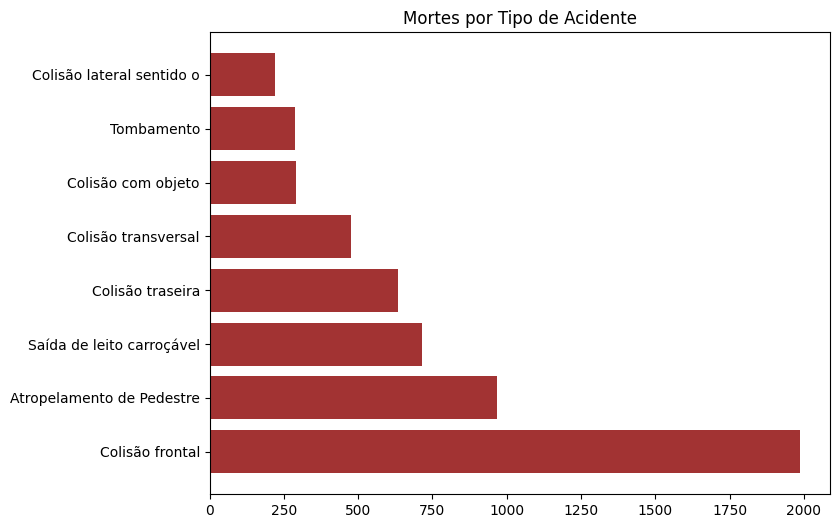

In [23]:
# Soma o número de mortos por tipo de acidente e seleciona os 8 mais letais
mortalidade_tipo = abt01.groupby('tipo_acidente')['mortos'].sum().sort_values(ascending=False).head(8)

# Gráfico de barras horizontais
plt.figure(figsize=(8,6))
plt.barh(range(len(mortalidade_tipo)), mortalidade_tipo.values, color='darkred', alpha=0.8)

# Ajusta rótulos para não ficarem longos demais
plt.yticks(range(len(mortalidade_tipo)), [tipo[:25] for tipo in mortalidade_tipo.index])
plt.title('Mortes por Tipo de Acidente')

# Mostra o gráfico
plt.show()

### Taxa de mortalidade por BR

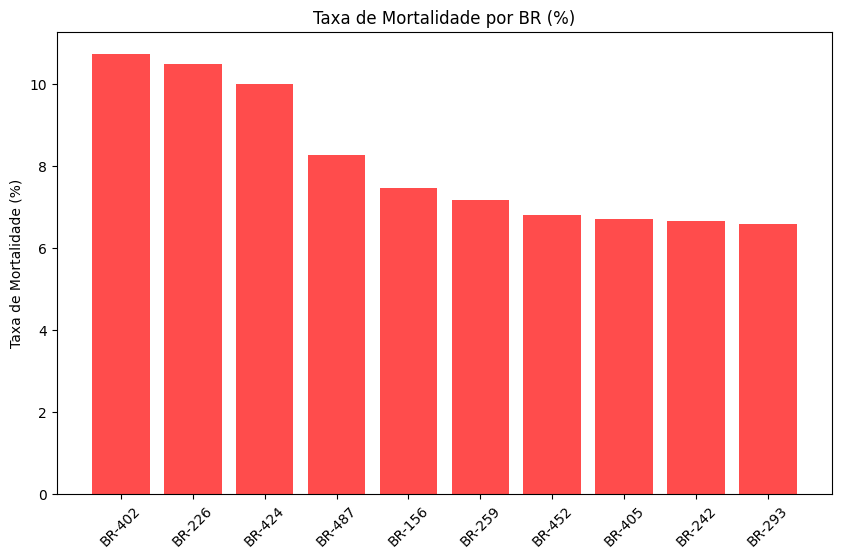

In [24]:
# Calcula estatísticas por BR (total de mortos e total de pessoas envolvidas)
br_stats = abt01.groupby('br').agg({
    'mortos': 'sum',
    'pessoas': 'sum'
}).reset_index()

# Calcula taxa de mortalidade (% de mortos entre os envolvidos)
br_stats['taxa_mortalidade'] = (br_stats['mortos'] / br_stats['pessoas'] * 100)

# Filtra BRs com pelo menos 100 pessoas envolvidas e pega o top 10 mais letais
br_stats = br_stats[br_stats['pessoas'] >= 100].sort_values('taxa_mortalidade', ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(range(len(br_stats)), br_stats['taxa_mortalidade'], color='red', alpha=0.7)

# Ajusta rótulos
plt.xticks(range(len(br_stats)), [f'BR-{br}' for br in br_stats['br']], rotation=45)
plt.title('Taxa de Mortalidade por BR (%)')
plt.ylabel('Taxa de Mortalidade (%)')

# Mostra o gráfico
plt.show()

### Acidentes graves por hora do dia

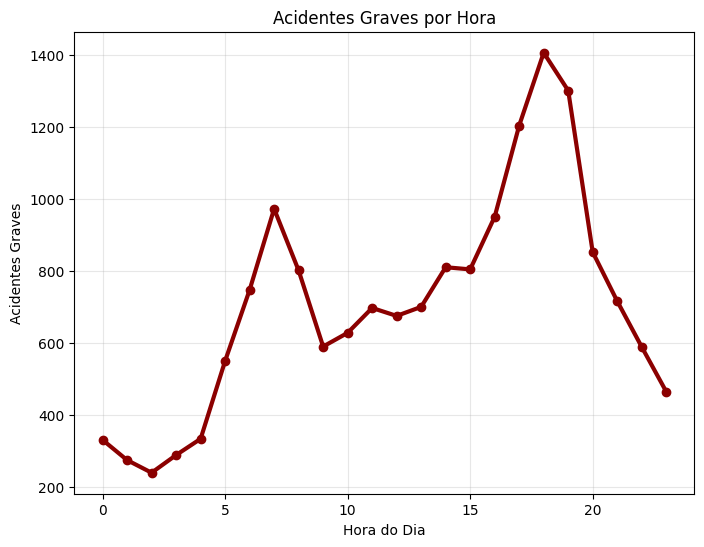

In [25]:
# Filtra apenas acidentes graves e agrupa por hora
acidentes_graves_hora = abt01[abt01['acidente_grave']].groupby('horario').size()

# Gráfico de linha mostrando quando ocorrem mais acidentes graves
plt.figure(figsize=(8,6))
plt.plot(
    acidentes_graves_hora.index, 
    acidentes_graves_hora.values, 
    marker='o', color='darkred', linewidth=3, markersize=6
)

# Ajusta título e eixos
plt.title('Acidentes Graves por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Acidentes Graves')
plt.grid(True, alpha=0.3)

# Mostra o gráfico
plt.show()


### Insights de gravidade

In [26]:
# Mostra os principais fatores críticos relacionados à gravidade dos acidentes
print("INSIGHTS DE GRAVIDADE:")

# Tipo de acidente mais letal
print(f"💀 Tipo mais letal: {mortalidade_tipo.index[0]} ({mortalidade_tipo.iloc[0]} mortes)")

# BR com maior taxa de mortalidade
print(f"🛣️  BR mais letal: BR-{br_stats.iloc[0]['br']} ({br_stats.iloc[0]['taxa_mortalidade']:.2f}% mortalidade)")

# Hora do dia com mais acidentes graves
print(f"🕐 Hora mais perigosa: {acidentes_graves_hora.idxmax()}h ({acidentes_graves_hora.max()} acidentes graves)")


INSIGHTS DE GRAVIDADE:
💀 Tipo mais letal: Colisão frontal (1987 mortes)
🛣️  BR mais letal: BR-402.0 (10.73% mortalidade)
🕐 Hora mais perigosa: 18h (1405 acidentes graves)
